<h1>Chapter 1.4.10 Histograms in OpenCV</h1>

<p>히스토그램(histogram)은 데이터 값의 분포를 그래프 형태로 표현한 것으로, 특히 이미지 처리에서 각 픽셀의 밝기 또는 색상 값이 얼마나 자주 발생하는지를 시각화할 때 자주 사용됩니다.</p>
<p>그레이스케일 이미지의 경우 픽셀 값이 0부터 255까지 범위를 가질 수 있습니다.</p>

In [59]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

<h2>1. Using Matplotlib</h2>

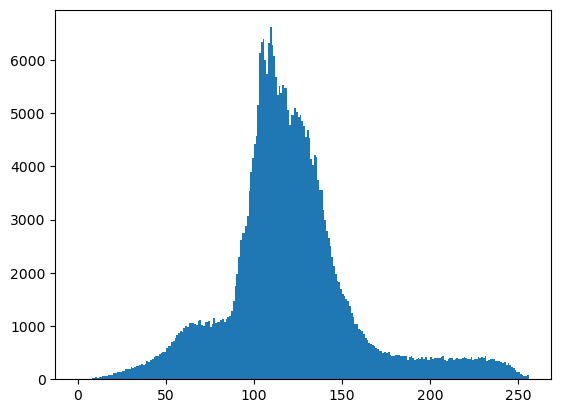

In [60]:
# 그레이스케일 영상의 히스토그램 출력
img = cv2.imread('testImg.jpg',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

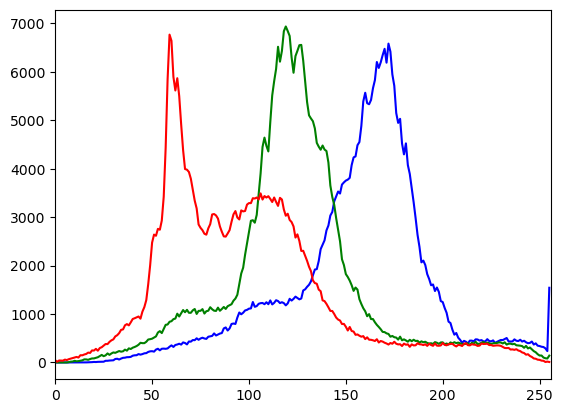

In [61]:
# B, G, R 채널 별 히스토그램 출력
img = cv2.imread('testImg.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
  histr = cv2.calcHist([img],[i],None,[256],[0,256])
  plt.plot(histr,color = col)
  plt.xlim([0,256])
plt.show()

<h2>2. Using OpenCV</h2>

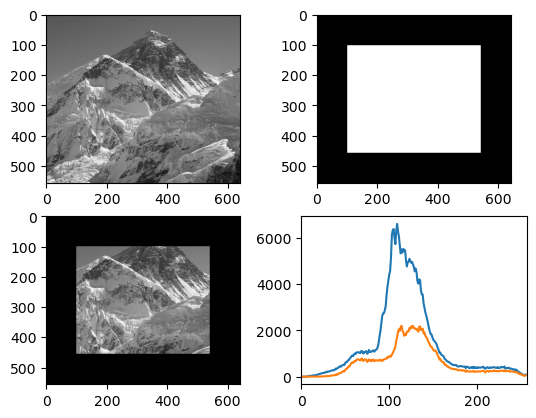

In [62]:
img = cv2.imread('testImg.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)

# 바깥의 100 만큼의 영역은 255(검은색) 처리
mask[100:456, 100:542] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

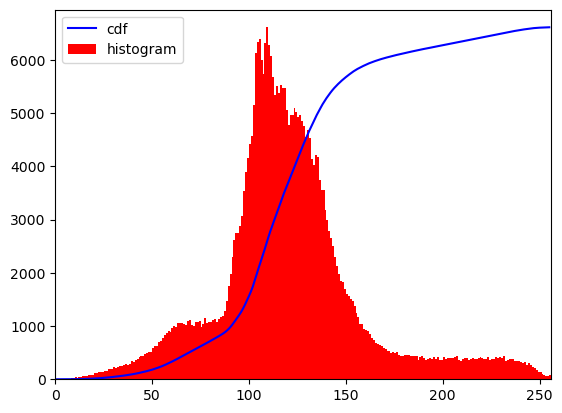

In [63]:
img = cv2.imread('testImg.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

plt.show()

In [64]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [65]:
img2 = cdf[img]

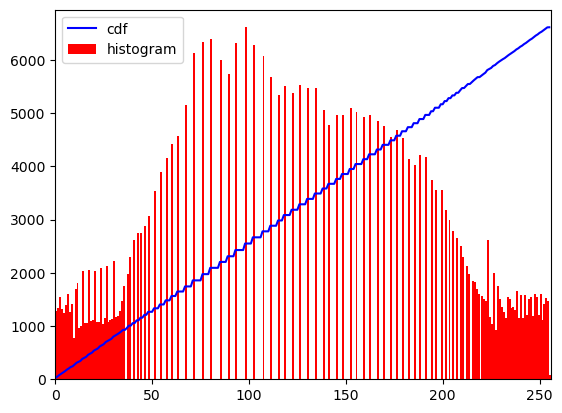

In [66]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

plt.show()

<h2>Histograms Equalization in OpenCV</h2>

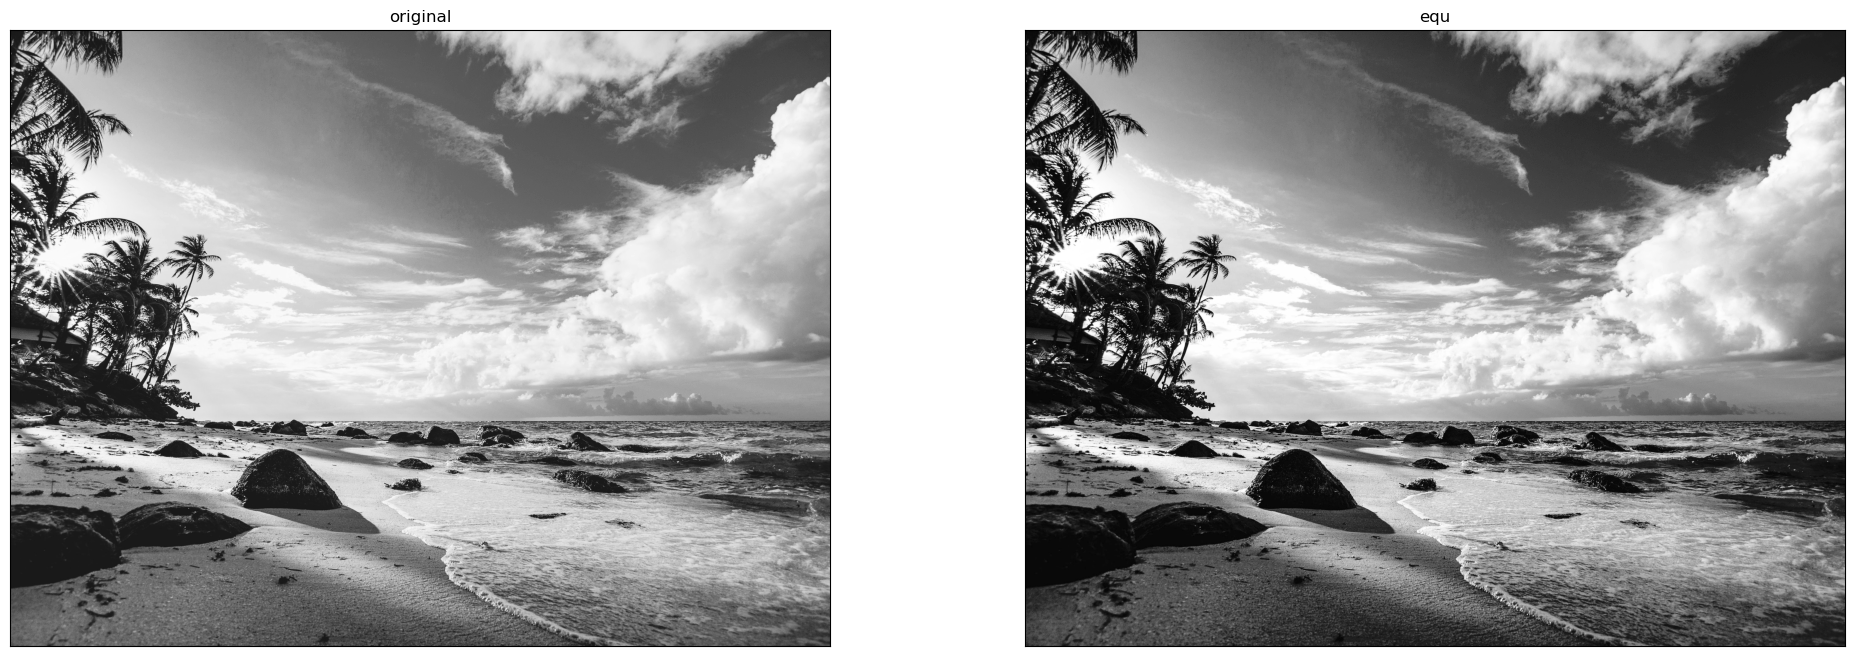

In [79]:
img = cv2.imread('./datasets/test4.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side

plt.figure(figsize=(24,8))
plt.subplot(1,2,1),plt.imshow(img, 'gray')
plt.title('original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(equ, 'gray')
plt.title('equ'), plt.xticks([]), plt.yticks([])

plt.show()

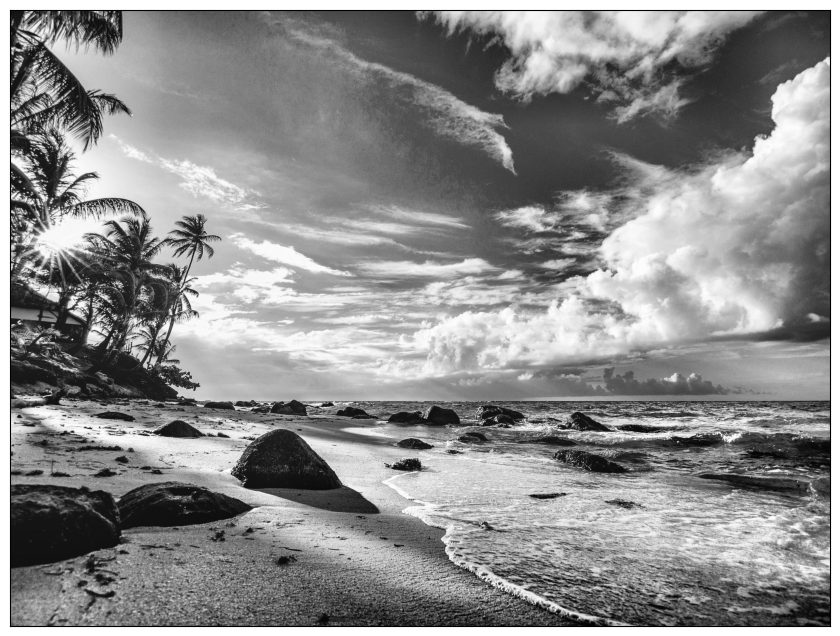

In [83]:
img = cv2.imread('./datasets/test4.jpg',0)
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

plt.figure(figsize=(24,8))
plt.subplot(1,2,1),plt.imshow(cl1, 'gray')
plt.xticks([]), plt.yticks([])

plt.show()